<a href="https://colab.research.google.com/github/Nithinps021/Project_IISU/blob/main/Chatbot_retrieval_gru_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, Dense, Activation, Flatten, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.optimizers import SGD

In [2]:
data_file = open('is_train.json').read()
intents = json.loads(data_file)
random.shuffle(intents)

In [3]:
classes=[]
for i in intents:
  if i[1] not in classes:
    classes.append(i[1])

tot_data=len(intents)
tot_classes=len(classes)
x_train=np.array([])
y_train=np.zeros(shape=(tot_data,tot_classes), dtype=np.uint8)

In [4]:
for i in range(tot_data):
  x_train=np.append(x_train,intents[i][0])
  y_train[i][classes.index(intents[i][1])]=1

In [5]:
text=x_train
Tokenizer = Tokenizer()
Tokenizer.fit_on_texts(text) 
Tokenizer_vocab_size = len(Tokenizer.word_index) + 1
Tokenizer_vocab_size, x_train.shape, y_train.shape

(5230, (15000,), (15000, 150))

In [6]:
x_val=x_train[0:1500]
y_val=y_train[0:1500]

x_train=x_train[1500:]
y_train=y_train[1500:]


In [7]:
X_train_encoded_words = Tokenizer.texts_to_sequences(x_train)
X_val_encoded_words = Tokenizer.texts_to_sequences(x_val)
X_train_encoded_padded_words = sequence.pad_sequences(X_train_encoded_words, maxlen = 100)
X_val_encoded_padded_words = sequence.pad_sequences(X_val_encoded_words, maxlen = 100)

In [8]:
X_train_encoded_padded_words

array([[   0,    0,    0, ...,   75,   40, 1978],
       [   0,    0,    0, ...,    9,   15,  404],
       [   0,    0,    0, ...,    0,  426,  879],
       ...,
       [   0,    0,    0, ...,   57,  950, 1609],
       [   0,    0,    0, ..., 2035,   48, 1547],
       [   0,    0,    0, ...,    2,   12,   34]], dtype=int32)

In [12]:

model = Sequential()

model.add(Embedding(Tokenizer_vocab_size, 32, input_length = 100)) 

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)))
model.add(Dropout(0.5))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(150, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           167360    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12672     
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 800)               52000     
                                                                 
 dropout_4 (Dropout)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               160200    
                                                      

In [13]:
Nadam = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])

history  = model.fit(X_train_encoded_padded_words,y_train, epochs = 30, batch_size=100, verbose=1, validation_data=(X_val_encoded_padded_words, y_val))


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


135/135 [==============================] - 13s 67ms/step - loss: 4.7458 - accuracy: 0.0170 - val_loss: 3.9195 - val_accuracy: 0.0753
Epoch 2/30
135/135 [==============================] - 8s 60ms/step - loss: 3.5917 - accuracy: 0.1025 - val_loss: 2.7091 - val_accuracy: 0.2953
Epoch 3/30
135/135 [==============================] - 8s 61ms/step - loss: 2.7866 - accuracy: 0.2067 - val_loss: 1.9809 - val_accuracy: 0.4707
Epoch 4/30
135/135 [==============================] - 8s 59ms/step - loss: 2.2823 - accuracy: 0.3113 - val_loss: 1.5693 - val_accuracy: 0.5980
Epoch 5/30
135/135 [==============================] - 8s 58ms/step - loss: 1.9566 - accuracy: 0.3965 - val_loss: 1.3908 - val_accuracy: 0.6353
Epoch 6/30
135/135 [==============================] - 8s 59ms/step - loss: 1.7556 - accuracy: 0.4536 - val_loss: 1.2236 - val_accuracy: 0.6967
Epoch 7/30
135/135 [==============================] - 8s 60ms/step - loss: 1.5716 - accuracy: 0.4967 - val_loss: 1.1267 - val_accuracy: 0.7220
Epoch 8/3

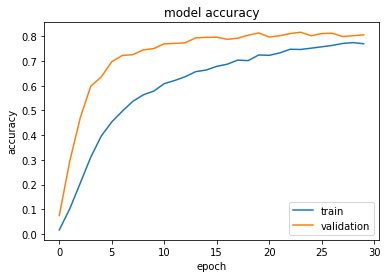

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()